# Interpolation

Interpolation differs from something like lieanl regression in the way that we dont really know what is the "model" that a series of data points will follow, even if it can be something linear-like, interpolation FINDS a function such that ALL points are considered in that function!

One must be careful with methods like lagrange interpolations, since if there are two points that are way too close there's usally very high spikes that can lead to wrong models of data

## 1) Proyectile movement



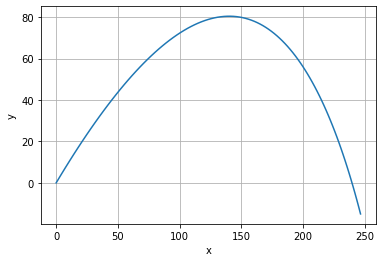

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2


def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t
  return 1./b * t1 * t2 - t3

t = np.linspace(0,8.5,100)
constants = (vo, theta, u, alpha, b , g)
x = pos_x(t, *constants)
y = pos_y(t, *constants)

dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

## 3 Hermite Interpolation

### 3.1 Graphical representation

       4             3         2
3.316 x + 1.041e-17 x - 4.277 x + 5.204e-18 x + 1


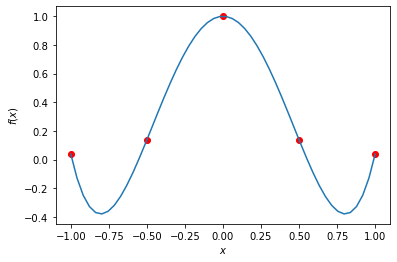

       8             7         6             5         4             3
53.69 x - 6.661e-15 x - 102.8 x + 1.899e-14 x + 61.37 x - 1.134e-14 x
         2
 - 13.2 x - 8.554e-16 x + 1


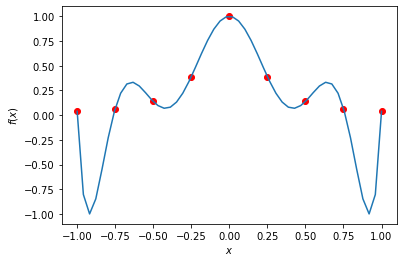

       12             11        10             9        8             7
909.9 x  - 1.098e-12 x  - 2336 x  - 1.838e-11 x + 2202 x - 1.946e-12 x
          6             5         4             3         2
 - 955.4 x + 2.929e-13 x + 198.7 x + 7.632e-14 x - 19.58 x - 4.255e-15 x + 1


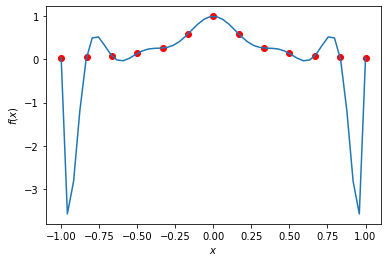

          16             15             14             13
1.54e+04 x  - 8.588e-11 x  - 4.971e+04 x  + 7.641e-10 x 
              12             11             10             9
 + 6.374e+04 x  + 3.534e-09 x  - 4.187e+04 x  + 1.819e-09 x
              8             7        6             5       4
 + 1.521e+04 x + 1.506e-10 x - 3100 x + 1.928e-11 x + 352 x
              3         2
 + 4.931e-13 x - 22.78 x - 3.776e-15 x + 1


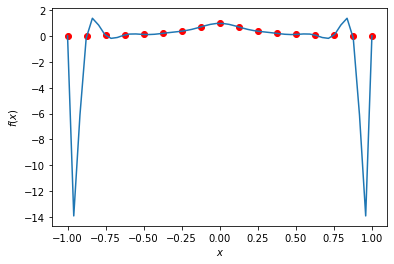

           20             19             18             17
2.602e+05 x  - 1.948e-08 x  - 1.012e+06 x  - 1.051e-07 x 
              16             15             14             13
 + 1.639e+06 x  + 5.895e-07 x  - 1.443e+06 x  + 1.291e-06 x 
              12             11             10             9
 + 7.573e+05 x  + 4.491e-07 x  - 2.452e+05 x  + 6.563e-09 x
              8             7        6           5         4
 + 4.932e+04 x - 3.589e-09 x - 6119 x - 8.3e-11 x + 470.8 x
              3         2
 - 2.395e-14 x - 24.14 x + 6.372e-16 x + 1


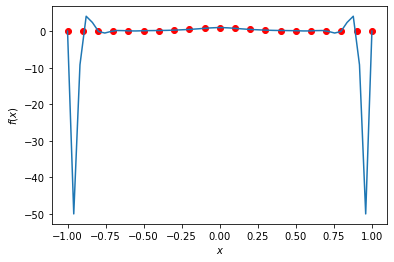

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

def f(x):
    return 1/(1+(25*x**2))

n_points = [4,8,12,16,20]

for n in n_points:
    
    xAxis = np.linspace(-1,1,n+1)
    yAxis = []
    
    #We plot each point of the function as required
    for x in xAxis:
        plt.plot(x,f(x),"ro")
        yAxis.append(f(x))
    
    # We calculate the lagrange polynomial and plot it with 50 samples for each graph
    polyLagrange = lagrange(xAxis,yAxis)
    linSpace = np.linspace(-1,1,50)
    plt.plot(linSpace,polyLagrange(linSpace))
    print(polyLagrange)
    
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.show()

###  3.2 error discussion

Notice how with each polynomial the behavior of the interpolation polynomial becomes very erratic at the start and end of the function

let's now analize the error on the 4 function **pending**

## 4 Cubic splines

### 4.1 imread // imshow

C:\Users\pegan\AppData\Local\Temp\ipykernel_4540\644503881.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  image = plt.imread(URL)


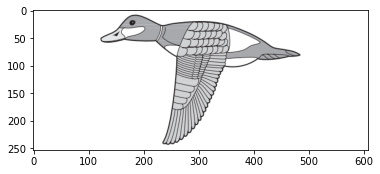

In [10]:
URL = "https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/Asignaciones/Laboratorios/paloma.png"
image = plt.imread(URL)
plt.imshow(image)

### 4.2 point list

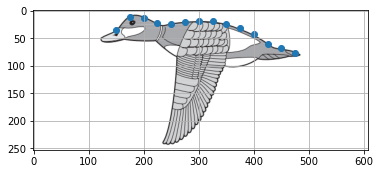

In [61]:
pointsXCoords = range(150,500,25)
pointsYCoords = [35,12,14,22,24,20,18,18,24,32,42,60,68,76]

def showImgPoints():
    plt.imshow(image)
    plt.grid()
    plt.scatter(pointsXCoords, pointsYCoords)

showImgPoints()

### 4.3 Lagrange

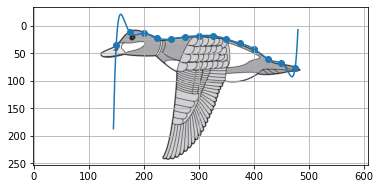

In [98]:
showImgPoints()

fitLagrange = lagrange(pointsXCoords,pointsYCoords)

#plot the lagrange fit
linSpace = np.linspace(145,480,300)
plt.plot(linSpace,fitLagrange(linSpace))

### 4.4 Splines

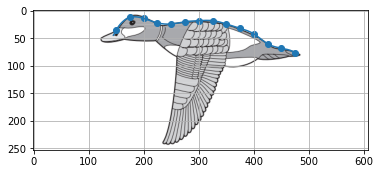

In [102]:
from scipy.interpolate import CubicSpline

showImgPoints()

fitCSplines = CubicSpline(pointsXCoords,pointsYCoords)

#plot the lagrange fit
linSpace = np.linspace(145,480,300)
plt.plot(linSpace,fitCSplines(linSpace))